#Pendahuluan
AWS atau Amazon Web Services didirikan pada tahun 2006. AWS menawarkan berbagai produk dan layanan yang mencakup berbagai bidang, termasuk komputasi awan. Tiga model komputasi awan utama di AWS adalah Infrastruktur sebagai Layanan (IaaS), Platform sebagai Layanan (PaaS), dan Perangkat Lunak sebagai Layanan (SaaS). Dengan menggabungkan ketiga model komputasi awan ini, AWS memberikan fleksibilitas dan skalabilitas kepada pengguna untuk memenuhi kebutuhan TI mereka secara efisien dan hemat biaya.

Sekarang, fokus pada AWS SaaS. Perangkat Lunak sebagai Layanan (SaaS) adalah model perangkat lunak berbasis awan yang menyediakan aplikasi kepada pelanggan melalui internet. Dalam model ini, vendor SaaS menghosting dan mengelola layanan dan aplikasi yang dapat diakses oleh pelanggan sesuai permintaan. Dengan SaaS, pelanggan tidak perlu lagi khawatir tentang pemeliharaan layanan atau pengelolaan infrastruktur yang mendasarinya; fokus utama mereka adalah memanfaatkan perangkat lunak. Karakteristik lain dari model SaaS adalah struktur harga, yang sering kali melibatkan model berbasis langganan atau bayar sesuai pemakaian, alih-alih membeli semua fungsionalitas sekaligus. Contoh umum aplikasi SaaS adalah Amazon WorkDocs, sebuah layanan penyuntingan dokumen. Dengan Amazon WorkDocs, pelanggan dapat menyimpan, berbagi, dan berkolaborasi dokumen dengan aman di cloud

#Latar Belakang Masalah
berdasarkan data yang ini akan dilakukan pengujian untuk mengetahui :
1. Analisis Profitabilitas: `Produk`, `segment` , atau wilayah (`Region`/`Country`) mana yang secara konsisten menghasilkan keuntungan tertinggi dan terendah?
2. Kinerja Regional: Wilayah (`Region`/`Country`) mana yang menjadi pasar utama (market leader) dalam hal total `Sales` dan `Quantity`?
3. Popularitas dan Nilai Produk: `Product` mana yang paling sering dibeli `Quantity` dan menghasilkan pendapatan tertinggi `Sales`?

#Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data Airbnb Listings di Bangkok yang telah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1v0kBz-gJEZac4E1B4zsD-rgHonpKiCCN?usp=drive_link)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, pearsonr
from google.colab import drive
drive.mount('/content/drive')
from io import StringIO

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Dataset ini berisi informasi terkait data penjualan yang berisi yang terdiri dari 19 data set yang terdiri dari Data Pembelian, Riwayat wilayah, industri dan penjuaalannya
1. Row ID: A unique identifier for each transaction.
2. Order ID: A unique identifier for each order.
3. Order Date: The date when the order was placed.
4. Date Key: A numerical representation of the order date (YYYYMMDD).
5. Contact Name: The name of the person who placed the order.
6. Country: The country where the order was placed.
7. City: The city where the order was placed.
8. Region: The region where the order was placed.
9. Subregion: The subregion where the order was placed.
10. Customer: The name of the company that placed the order.
11. Customer ID: A unique identifier for each customer.
12. Industry: The industry the customer belongs to.
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product: The product was ordered.
15. License: The license key for the product.
16. Sales: The total sales amount for the transaction.
17. Quantity: The total number of items in the transaction.
18. Discount: The discount applied to the transaction.
19. Profit: The profit from the transaction.

In [6]:
# Gunakan Data yang sudah tersimpan di Google Drive
data_base = '/content/drive/MyDrive/Capstone Project 2 SaaS Sales/SaaS-Sales.csv'
df=pd.read_csv(data_base)
display(df.head(),df.tail())


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


## Data Understanding and Cleaning

sebelum kita memulai dan melakukan analisis terhadap data yang dimiliki, kita harus melakukan pengecekan terlebih dahulu apalah ada anomali-anomali yang ada pada data tersebut sehingga bisa dilakukan treatment terhadap data tersebut sehingga data yang diolah nantinya sample yang digunakan dapat mencerminkan populasi yang ada

In [7]:
# cari tahu terkait detail datanya
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      99

## Dari hasil ini terlihat:
* Ada 9.994 baris dan 19 kolom.
* data diatas tidak memiliki missing values.
* Tipe data:`float64` (3 kolom) , `int64` (4 kolom) , `object` (12 kolom)

In [8]:
# sebelum memulai data harusnya dilakukan pengecekan apakah ada data yang NaN atau tidak
missing_value =df.isna().sum()
missing_value

,0
Row ID,0
Order ID,0
Order Date,0
Date Key,0
Contact Name,0
Country,0
City,0
Region,0
Subregion,0
Customer,0


pengecekan data ini dilakukan untuk memperkuat argumen bahwa data diatas tidak memiliki missing value, dimana semua data terisi

In [9]:
# digunakan untuk menampilkan data dalam bentuk yang lebih rapi
pd.set_option('display.max_colwidth', None)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],data=listItem)
tabelDesc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

Dari hasil diatas terlihat bahwa :
* `Order ID`: 5009 nilai unik.
* `Customer ID`: 99 nilai unik dimana sama dengan nilai dari `Customer`.
* `Industri` : terdapat 10 jenis Industri
* `Product` : terdapat 14 jenis Product
* `Lisence` : terdapat 9994 nilai unik dimana untuk setiap transaksi memiliki lisence yang unik


In [10]:
#Untuk mengambil beberapa sample data yang sudah rapi dan memastikan kembali apakah datanya masih ada yang missing value atau tidak
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],data=listItem)
print(df.shape)
dfDesc

(9994, 19)


,dataFeatures,dataType,null,unique,uniqueSample
0,Row ID,int64,0,9994,"[983, 8015]"
1,Order ID,object,0,5009,"[EMEA-2023-168179, APJ-2023-138163]"
2,Order Date,object,0,1237,"[12/31/2020, 8/20/2020]"
3,Date Key,int64,0,1237,"[20210822, 20201217]"
4,Contact Name,object,0,793,"[Alexandra Dyer, Chloe Underwood]"
5,Country,object,0,48,"[Netherlands, Germany]"
6,City,object,0,262,"[San Jose, Hyderabad]"
7,Region,object,0,3,"[EMEA, AMER]"
8,Subregion,object,0,12,"[MEA, NOR]"
9,Customer,object,0,99,"[Walt Disney, Lowes]"


# Analisis Deskriptif
setelah dilakukan pengecekan data, dalam hal ini kita bisa mengetahui apakah datanya memiliki Missing Value atau tidak dan juga kita dapat mengetahui jenis datanya, kita dapat melakukan uji deskriptif

In [11]:
# digunakan untuk menampilkan ringkasan statistik dari data frame
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,3NTBV9B3PS
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


## Analisis Deskriptif

1. Sales (Penjualan)
- Rata-rata penjualan per transaksi: 229.86
- Median penjualan: 54.49 (lebih kecil dari rata-rata → distribusi right-skewed, ada outlier nilai besar).
- Nilai minimum: 0.44
- Nilai maksimum: 22,638.48 → perbedaan sangat besar, menunjukkan adanya beberapa transaksi bernilai sangat tinggi.

2. Quantity (Jumlah Produk)
- Rata-rata jumlah produk: 3.78
- Median: 3 → distribusi relatif normal.
- Min: 1, Max: 14 → pembelian produk biasanya dalam jumlah kecil, mayoritas di bawah 5 unit.

3. Discount (Diskon)
- Rata-rata diskon: 15.6%
- Median: 20% → sebagian besar transaksi menggunakan diskon 20%.
- Max: 80% → ada transaksi dengan diskon sangat besar (berpotensi memengaruhi profit negatif).

4. Profit (Keuntungan)
- Rata-rata profit per transaksi: 28.65
- Median: 8.67 → profit cenderung kecil, dengan adanya outlier besar.
- Nilai minimum: -6,599.97 (kerugian besar)
- Nilai maksimum: 8,399.97 → gap sangat lebar, menunjukkan variabilitas tinggi dalam profitabilitas tiap transaksi.


# Analisis Penjualan berdasarkan negara

In [12]:
# Hitung Metrik Agregat per Negara
# Mengelompokkan data berdasarkan 'Country' dan menghitung total Sales, Quantity, dan Profit
country_profit = df.groupby('Country').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Quantity=('Quantity', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Hitung Margin Keuntungan Rata-rata per Negara
# Margin Keuntungan = (Total Profit / Total Sales) * 100
country_profit['Avg_Profit_Margin'] = (country_profit['Total_Profit'] / country_profit['Total_Sales']) * 100

# Urutkan berdasarkan Total_Profit untuk menemukan yang tertinggi dan terendah
country_profit_sorted = country_profit.sort_values(by='Total_Profit', ascending=False)

# Identifikasi Negara Profit Paling Untung (Top 5)
df_country_profit = pd.DataFrame(country_profit_sorted)
df_country_profit.head()


,Country,Total_Sales,Total_Quantity,Total_Profit,Avg_Profit_Margin
47,United States,457687.6315,7667,76381.3871,16.688541
46,United Kingdom,313169.8810,4268,74989.0891,23.945179
5,Canada,138641.2700,1883,33402.6517,24.092863
4,Brazil,76269.6140,946,24463.1876,32.074618
40,Spain,70636.7200,893,18597.9504,26.329012


In [13]:
# Identifikasi Negara Profit Paling Rugi (Bottom 5)
df_country_profit = pd.DataFrame(country_profit_sorted)
df_country_profit.tail()

,Country,Total_Sales,Total_Quantity,Total_Profit,Avg_Profit_Margin
41,Sweden,55603.1640,983,-7490.9122,-13.472097
1,Australia,80166.1010,1845,-12607.8870,-15.727205
15,France,116511.9140,2153,-15559.9603,-13.354823
26,Mexico,78258.1360,1759,-16971.3766,-21.686405
24,Japan,170188.0458,3724,-25729.3563,-15.118192


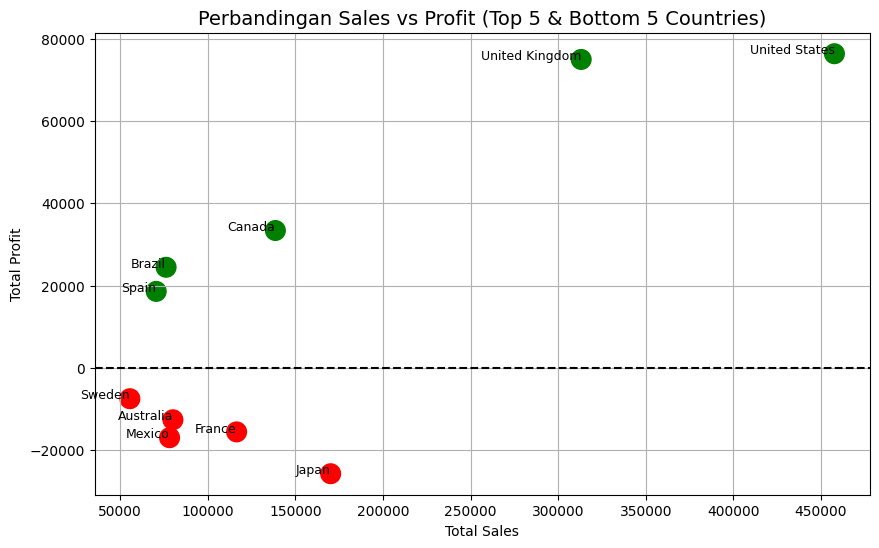

In [14]:
# Ambil data top 5 dan bottom 5 negara berdasarkan profit
top5_profit_countries = country_profit_sorted.head(5)
bottom5_profit_countries = country_profit_sorted.tail(5)

# Gabungkan keduanya untuk visualisasi perbandingan
compare_profit = pd.concat([top5_profit_countries, bottom5_profit_countries])

# Visualisasi Scatter Plot: Sales vs Profit
plt.figure(figsize=(10,6))
plt.scatter(compare_profit['Total_Sales'], compare_profit['Total_Profit'], s=200, c=['green']*5 + ['red']*5)

# Tambahkan label negara di titik scatter
for i, row in compare_profit.iterrows():
    plt.text(row['Total_Sales'], row['Total_Profit'], row['Country'], fontsize=9, ha='right')

plt.title("Perbandingan Sales vs Profit (Top 5 & Bottom 5 Countries)", fontsize=14)
plt.xlabel("Total Sales")
plt.ylabel("Total Profit")
plt.axhline(0, color='black', linestyle='--')  # garis nol untuk profit
plt.grid(True)
plt.show()

## Laporan Penjualan
Kesimpulan Strategis
1. Negara dengan Profit Tertinggi
- United States & United Kingdom → menjadi tulang punggung revenue global, meski US perlu meningkatkan margin agar lebih sehat.
- Canada → margin sudah bagus, tinggal ditingkatkan volume untuk menjadi pasar utama berikutnya.
- Brazil & Spain → walau volume lebih kecil, margin tinggi menjadikan keduanya pasar yang sangat menguntungkan → layak diprioritaskan untuk ekspansi profitabilitas.

2. Negara dengan Profit Terendah
- Sweden & Australia → pasar relatif kecil dan rugi, perlu evaluasi apakah layak dilanjutkan.
- France → penjualan tinggi tetapi rugi, menandakan strategi diskon/biaya operasional tidak efektif.
- Mexico → margin negatif terbesar (-21.7%), model penjualan harus dirombak total.
- Japan → walau sales tinggi, rugi besar → perlu strategi khusus, misalnya pricing lokal, bundling produk, atau partnership.

3. Visualisasi Sales vs Profit
- Negara Hijau (Top 5) → berada di kuadran positif (sales tinggi, profit tinggi).
- Negara Merah (Bottom 5) → berada di bawah garis nol, artinya walaupun ada penjualan, justru mencatatkan kerugian.

Dengan kata lain, perusahaan bisa memfokuskan strategi ekspansi di negara hijau untuk meningkatkan skala, dan melakukan evaluasi bisnis di negara merah agar kerugian tidak semakin besar.

In [15]:
avg_global_sales = country_profit['Total_Sales'].mean()
low_margin_countries = country_profit[
    (country_profit['Total_Sales'] > avg_global_sales) &
    (country_profit['Avg_Profit_Margin'] < 10)
]
if not low_margin_countries.empty:
    low_margin_countries_sorted = low_margin_countries.sort_values(by='Avg_Profit_Margin', ascending=True)
    print("\n* Negara dengan Penjualan di atas Rata-rata Global namun Margin di bawah 10% (Perlu diinvestigasi):")
    for index, row in low_margin_countries_sorted.head(3).iterrows():
        print(f"  - {row['Country']} (Sales: IDR {row['Total_Sales']:,.2f}, Margin: {row['Avg_Profit_Margin']:.2f}%)")
else:
     print("\n* Tidak ada negara dengan Penjualan Tinggi (> rata-rata global) namun Margin Sangat Rendah (< 10%).")


* Negara dengan Penjualan di atas Rata-rata Global namun Margin di bawah 10% (Perlu diinvestigasi):
  - Mexico (Sales: IDR 78,258.14, Margin: -21.69%)
  - Australia (Sales: IDR 80,166.10, Margin: -15.73%)
  - Japan (Sales: IDR 170,188.05, Margin: -15.12%)


In [16]:
# Negara dengan penjualan tinggi tapi margin rendah
# Filter negara yang Total_Sales-nya di atas rata-rata global DAN Avg_Profit_Margin-nya di bawah 10%

# Hitung Margin Keuntungan Rata-rata
country_profit['Avg_Profit_Margin'] = (country_profit['Total_Profit'] / country_profit['Total_Sales']) * 100

# --- Langkah 2: Hitung Rata-Rata Penjualan Global ---
avg_global_sales = country_profit['Total_Sales'].mean()
print(f"Rata-rata Total Sales per Negara (Global Mean): IDR {avg_global_sales:,.2f}\n")

# --- Langkah 3: Filter Negara Berdasarkan Kriteria ---
# Kriteria 1: Total Sales > Rata-Rata Global
# Kriteria 2: Avg Profit Margin < 10%
low_margin_countries = country_profit[
    (country_profit['Total_Sales'] > avg_global_sales) &
    (country_profit['Avg_Profit_Margin'] < 10)
]

# --- Langkah 4: Tampilkan Hasil ---
print("---------------------------------------------------------------------------------------")
print("⚠️ NEGARA DENGAN PENJUALAN TINGGI NAMUN MARGIN RENDAH (< 10%) - PERLU INVESTIGASI")
print("---------------------------------------------------------------------------------------")

if not low_margin_countries.empty:
    # Urutkan berdasarkan Margin Rata-rata terendah (paling inefisien)
    low_margin_countries_sorted = low_margin_countries.sort_values(by='Avg_Profit_Margin', ascending=True)

    # Display the DataFrame
    display(low_margin_countries_sorted)
else:
    print("* Tidak ada negara yang memenuhi kriteria (Penjualan > Rata-rata Global AND Margin < 10%).")
    print("  Semua negara dengan volume penjualan di atas rata-rata global memiliki margin yang sehat (>= 10%).")

Rata-rata Total Sales per Negara (Global Mean): IDR 47,858.35

---------------------------------------------------------------------------------------
⚠️ NEGARA DENGAN PENJUALAN TINGGI NAMUN MARGIN RENDAH (< 10%) - PERLU INVESTIGASI
---------------------------------------------------------------------------------------


,Country,Total_Sales,Total_Quantity,Total_Profit,Avg_Profit_Margin
26,Mexico,78258.1360,1759,-16971.3766,-21.686405
1,Australia,80166.1010,1845,-12607.8870,-15.727205
24,Japan,170188.0458,3724,-25729.3563,-15.118192
41,Sweden,55603.1640,983,-7490.9122,-13.472097
15,France,116511.9140,2153,-15559.9603,-13.354823
16,Germany,89473.7080,1379,-3399.3017,-3.799219


## Anomali Penjualan dengan Margin
Kesimpulan Strategis
1. Semua negara ini menunjukkan penjualan di atas rata-rata global, artinya ada demand kuat, tetapi pricing/biaya membuatnya tidak profitable.
2. Japan & France → pasar besar dan strategis, perlu reposisi harga, bundling produk, atau efisiensi biaya.
3. Mexico & Australia → pasar menengah tapi margin negatif ekstrem → perlu perbaikan strategi pemasaran, atau bisa dipertimbangkan untuk exit jika tidak kunjung profit.
4. Sweden → volume kecil, margin negatif → tidak prioritas, kemungkinan tidak layak investasi jangka panjang.

#Analisis Penjualan berdasarkan Waktu

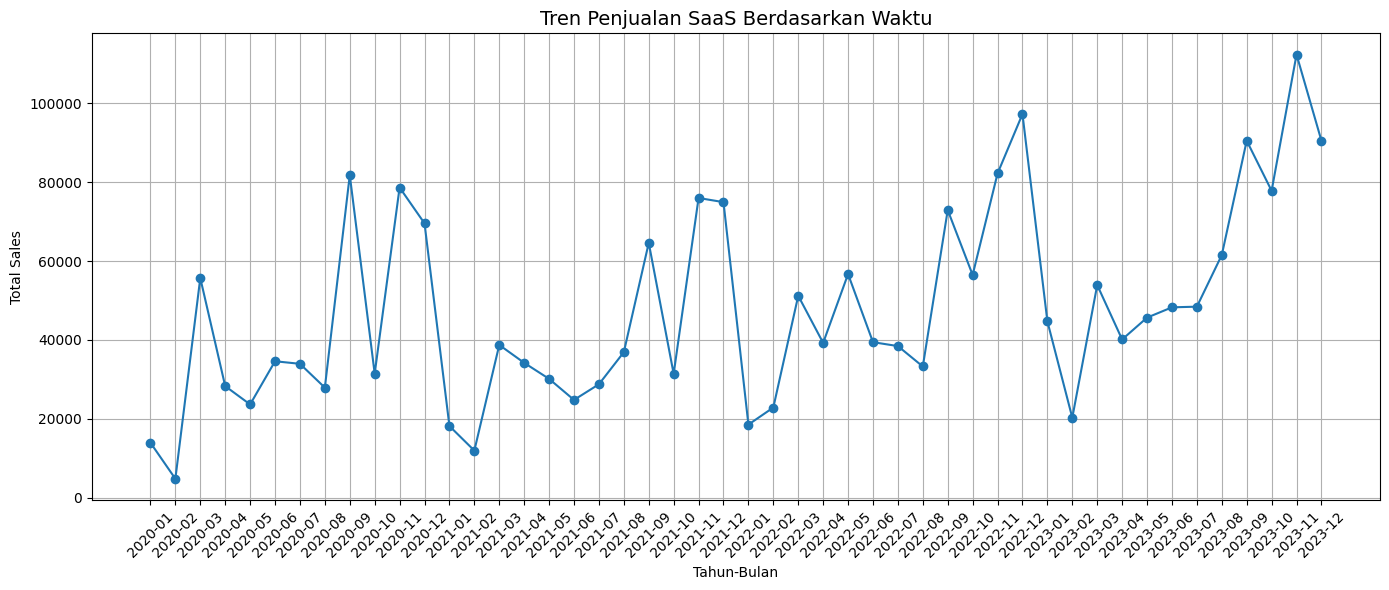

In [17]:
# Ubah kolom Order Date ke datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Buat kolom Tahun-Bulan
df['YearMonth'] = df['Order Date'].dt.to_period('M')

# Hitung total Sales per bulan
sales_trend = df.groupby('YearMonth')['Sales'].sum().reset_index()
sales_trend['YearMonth'] = sales_trend['YearMonth'].astype(str)

# Plot tren penjualan
plt.figure(figsize=(14,6))
plt.plot(sales_trend['YearMonth'], sales_trend['Sales'], marker='o')
plt.xticks(rotation=45)
plt.title("Tren Penjualan SaaS Berdasarkan Waktu", fontsize=14)
plt.xlabel("Tahun-Bulan")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()





## Hasil Analisis:

Penjualan cenderung fluktuatif dari tahun ke tahun.
Pada 2023, terjadi pertumbuhan signifikan terutama di kuartal akhir:

1. Jan 2023: 44.7K
2. Mar 2023: naik ke 53.9K
3. Aug 2023: melonjak ke 61.5K
4. Sep 2023: hampir 90.5K
5. Nov 2023: mencapai puncak 112.3K
6. Des 2023: tetap tinggi di 90.4K

Pola ini menunjukkan adanya musim penjualan (seasonality), di mana Q4 (Oktober–Desember) biasanya menjadi periode dengan penjualan tertinggi. Hal ini bisa terkait dengan budget closing perusahaan, diskon akhir tahun, atau strategi pemasaran akhir tahun.

# Kinerja Regional

In [18]:
# Analisis Market Leader berdasarkan REGION ---
# Agregasi Total Sales dan Total Quantity per Region
region_analysis = df.groupby('Region').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Quantity=('Quantity', 'sum')
).reset_index()

# Urutkan berdasarkan Total Sales (menurun)
region_analysis_sorted = region_analysis.sort_values(by='Total_Sales', ascending=False)


print("---------------------------------------------------------------------")
print("🥇 KINERJA REGIONAL (REGION) BERDASARKAN TOTAL SALES DAN QUANTITY:")
print("---------------------------------------------------------------------")
display(region_analysis_sorted)


# Analisis Market Leader berdasarkan COUNTRY (Top 5) ---
# Agregasi Total Sales dan Total Quantity per Country
country_analysis = df.groupby('Country').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Quantity=('Quantity', 'sum')
).reset_index()

# Urutkan berdasarkan Total Sales (menurun)
country_analysis_sorted = country_analysis.sort_values(by='Total_Sales', ascending=False).head(5)


print("\n\n---------------------------------------------------------------------")
print("🌍 TOP 5 MARKET LEADER BERDASARKAN COUNTRY (TOTAL SALES):")
print("---------------------------------------------------------------------")
display(country_analysis_sorted)

# --- 4. Kesimpulan Kinerja Market Leader ---
best_region = region_analysis_sorted.iloc[0]['Region']
best_country = country_analysis_sorted.iloc[0]['Country']
best_sales = country_analysis_sorted.iloc[0]['Total_Sales']

print("\n--- KESIMPULAN KINERJA REGIONAL ---")
print(f"Market Leader Utama Berdasarkan Region: {best_region}")
print(f"Negara Market Leader Utama Berdasarkan Sales: {best_country} (Total Sales: IDR {best_sales:,.2f})")

---------------------------------------------------------------------
🥇 KINERJA REGIONAL (REGION) BERDASARKAN TOTAL SALES DAN QUANTITY:
---------------------------------------------------------------------


,Region,Total_Sales,Total_Quantity
2,EMEA,1.043887e+06,16033
0,AMER,8.378496e+05,13879
1,APJ,4.154642e+05,7961




---------------------------------------------------------------------
🌍 TOP 5 MARKET LEADER BERDASARKAN COUNTRY (TOTAL SALES):
---------------------------------------------------------------------


,Country,Total_Sales,Total_Quantity
47,United States,457687.6315,7667
46,United Kingdom,313169.8810,4268
24,Japan,170188.0458,3724
5,Canada,138641.2700,1883
15,France,116511.9140,2153



--- KESIMPULAN KINERJA REGIONAL ---
Market Leader Utama Berdasarkan Region: EMEA
Negara Market Leader Utama Berdasarkan Sales: United States (Total Sales: IDR 457,687.63)


In [19]:
# Hitung total sales per negara
country_analysis = df.groupby('Country')['Sales'].sum().reset_index()

# Ambil Top 5 negara dengan penjualan tertinggi
country_analysis_sorted = country_analysis.sort_values(by='Sales', ascending=False).head(5)

# Buat diagram batang horizontal
fig_country = px.bar(
    country_analysis_sorted,
    y='Country',          # Sumbu Y adalah Country (biar horizontal)
    x='Sales',            # Sumbu X adalah Total Sales
    title='Top 5 Countries by Total Sales (Horizontal)',
    labels={'Sales': 'Total Sales (USD)'},
    text='Sales'          # Menampilkan nilai di batang
)

# Atur urutan agar sesuai ranking
fig_country.update_layout(
    yaxis={'categoryorder':'total ascending'},
    xaxis_tickformat=',.0f'  # Format angka ribuan
)

fig_country.show()

In [20]:
# Hitung total sales per region
region_analysis = df.groupby('Region')['Sales'].sum().reset_index()

# Urutkan dari yang terbesar ke terkecil
region_analysis_sorted = region_analysis.sort_values(by='Sales', ascending=False)

# Buat Pie Chart
fig_pie_region = px.pie(
    region_analysis_sorted,
    values='Sales',
    names='Region',
    title='Distribution of Total Sales by Region'
)

# Tambahkan persentase + nilai + label di dalam pie
fig_pie_region.update_traces(
    textposition='inside',
    textinfo='percent+value+label'
)

fig_pie_region.show()

## KESIMPULAN KINERJA REGIONAL
berdasarkan penjualan pernegara kita dapat menyimpulkan bahwa :
1. Penjualan SaaS terkonsentrasi pada beberapa negara utama.
2. Top 5 negara menyumbang porsi terbesar dari total penjualan global,menandakan adanya ketergantungan pada market tertentu.
3. Strategi penetrasi pasar perlu difokuskan pada negara-negara tersebut karena kontribusinya sangat signifikan.

berdasarkan penjualan perRegional kita dapat menyimpulkan bahwa :
1. Dari sisi regional, penjualan paling besar didominasi oleh Region tertentu.
2. Distribusi penjualan tidak merata antar region. Ada region yang menjadi kontributor utama, sementara region lain lebih kecil porsinya.
3. Hal ini membuka peluang untuk diversifikasi dan memperluas penetrasi di region yang saat ini kontribusinya masih kecil, seperti APAC


dari kedua hasil ini kita dapat mengambil kesimpulan ⁉Insight Strategis Gabungan

1. Market Leader: beberapa negara kunci menjadi tulang punggung revenue global.
2. Regional Dependence: ada ketergantungan tinggi pada 1–2 region, yang berpotensi berisiko jika kondisi pasar di sana terganggu.
3. Peluang Pertumbuhan: Region dengan kontribusi rendah bisa menjadi target ekspansi melalui strategi lokal (promosi, diskon, partnership).

In [23]:
import plotly.express as px

# Hitung Total Sales, Profit, dan Margin per Negara
df_country_sales = df.groupby('Country').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Hitung margin rata-rata per negara
df_country_sales['Profit_Margin (%)'] = (df_country_sales['Total_Profit'] / df_country_sales['Total_Sales']) * 100

# Buat Choropleth Map dengan gradasi biru muda → biru tua
fig = px.choropleth(
    df_country_sales,
    locations="Country",
    locationmode="country names",
    color="Total_Sales",
    hover_name="Country",
    hover_data={
        "Total_Sales": ":,.0f",
        "Total_Profit": ":,.0f",
        "Profit_Margin (%)": ":.2f"
    },
    # Warna custom dari biru muda → biru tua
    color_continuous_scale=["#cce5ff", "#004080"],
    title="Distribusi Total Penjualan SaaS per Negara",
    template="plotly_white"
)

# Tambahkan label skala warna agar jelas
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Total Sales",
        tickformat=",.0f"
    )
)

# Tampilkan Peta
fig.show()


# TAMPILAN RINGKASAN DATA (OPSIONAL)
print("\n--- Ringkasan Data Top 10 Penjualan Negara ---")
# print(df_sales_per_country.sort_values(by='Total Sales', ascending=False).head(10).to_markdown(index=False))
display(df_country_sales.sort_values(by='Total_Sales', ascending=False).head(10))


--- Ringkasan Data Top 10 Penjualan Negara ---


,Country,Total_Sales,Total_Profit,Profit_Margin (%)
47,United States,457687.6315,76381.3871,16.688541
46,United Kingdom,313169.8810,74989.0891,23.945179
24,Japan,170188.0458,-25729.3563,-15.118192
5,Canada,138641.2700,33402.6517,24.092863
15,France,116511.9140,-15559.9603,-13.354823
16,Germany,89473.7080,-3399.3017,-3.799219
1,Australia,80166.1010,-12607.8870,-15.727205
26,Mexico,78258.1360,-16971.3766,-21.686405
4,Brazil,76269.6140,24463.1876,32.074618
40,Spain,70636.7200,18597.9504,26.329012


## Kesimpulan Kinerja Regional

1. Distribusi Penjualan
- Peta menunjukkan bahwa penjualan SaaS tidak merata antar negara.
- Beberapa negara seperti United States, United Kingdom, Canada, Jepang, dan beberapa negara Eropa Barat mendominasi total sales.
- Negara-negara di kawasan Afrika dan sebagian Asia cenderung berada pada level penjualan yang rendah (warna lebih terang).

2. Profitabilitas
-Walaupun ada negara dengan penjualan tinggi, tidak semuanya menghasilkan profit yang tinggi.
- Beberapa negara besar (misalnya Japan, France, Mexico) justru menunjukkan margin negatif, menandakan adanya biaya tinggi atau strategi diskon yang merugikan.
- Sebaliknya, negara seperti Brazil dan Spain meski memiliki volume penjualan lebih kecil, justru mampu memberikan margin yang sehat (profit tinggi dibanding sales).

3. Pola Regional

- Amerika Utara (US, Canada) → kontribusi besar baik dari sisi sales maupun profit.
- Eropa Barat (UK, Spain) → pasar stabil dengan margin baik, tetapi ada juga negara bermasalah (France).
-Amerika Latin (Brazil, Mexico) → Brazil sangat menguntungkan, sementara Mexico justru merugi walau sales cukup tinggi.
-Asia (Japan, Australia) → demand besar, tetapi margin rendah → indikasi tantangan di strategi pricing atau biaya operasional.